In [ ]:
import matplotlib.pyplot as plt
import torch

plt.figure(figsize=(4, 4)) # 新建 6 X 6 英寸的画布

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

torch.Size([200, 200]) torch.Size([200, 200]) torch.Size([40000])


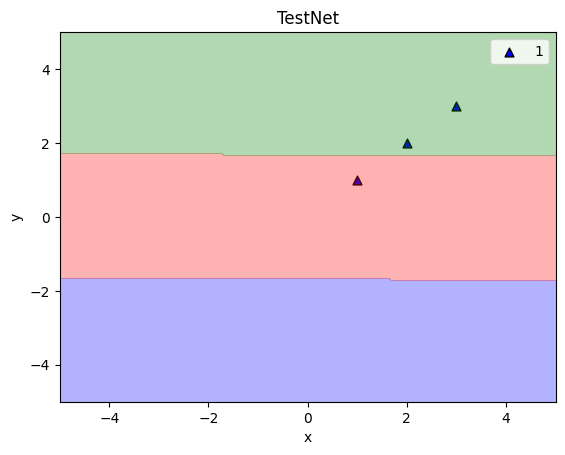

In [26]:
xx, yy = torch.meshgrid( # 生成一个二维的网格，前两个参数代表横纵
    torch.linspace(-5, 5, 200),
    torch.linspace(-5, 5, 200),
    indexing='xy'
)

print(xx.shape, yy.shape, xx.flatten().shape)

grid = torch.stack([xx.flatten(), yy.flatten()], dim=1) # 把二维坐标展开为 40000 X 2 的矩阵，每一行是一个点的坐标

# 有模型的话，可以将这些点前向传播输入模型看一下所属的类别

# with torch.no_grad():
#     logits = model(grid)        # shape [40000, 3]
#     preds = logits.argmax(dim=1)  # 取出每个点预测的类别索引
#     preds = preds.reshape(xx.shape)

preds = torch.tensor([i // 13333 for i in range(40000)])
preds = preds.reshape(xx.shape) # 存在网络的话，输出类别

colors = ['blue', 'red', 'green']
plt.scatter( # 绘制散点，前两个参数代表所有点的 x 的全部坐标和 y 的坐标，接下来代表颜色标签点的边缘和点的大小
    [1, 2, 3],
    [1, 2, 3],
    c='blue',
    label='1',
    marker='^',
    edgecolors='k',
    s=40
)
plt.contourf(xx, yy, preds, levels=[-0.5, 0.5, 1.5, 2.5], alpha=0.3, colors=colors) # levels 代表颜色的个数，colors 代表使用定义的颜色

plt.legend() # 显示图例，也就是类别
plt.title('TestNet') # 设置标题
plt.xlabel('x') # 横坐标名字
plt.ylabel('y') # 纵坐标名字
plt.show()